In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('D:\\User\Zhixuan Ge\Onedrive TUDelft\OneDrive - Delft University of Technology\Courses\ML for EE\SZD\S&S_SZD\Project_Data_EE4C12_S&S_SZD.csv')
data

,Patient,annotation,min|FP1-F7,min|F7-T3,min|T3-T5,min|T5-O1,min|FP2-F8,min|F8-T4,min|T4-T6,min|T6-O2,...,norm_power_HF|CZ-C4,norm_power_HF|C4-T4,norm_power_HF|FP1-F3,norm_power_HF|F3-C3,norm_power_HF|C3-P3,norm_power_HF|P3-O1,norm_power_HF|FP2-F4,norm_power_HF|F4-C4,norm_power_HF|C4-P4,norm_power_HF|P4-O2
0,258,1,50,61,57,53,39,35,39,35,...,0.016087,0.066920,0.102402,0.481384,0.690787,0.154544,0.062533,0.046460,0.066575,0.086999
1,258,1,48,62,60,46,38,35,39,33,...,0.024006,0.064857,0.031791,0.225788,0.409987,0.184671,0.071133,0.022369,0.079494,0.047536
2,258,1,51,60,59,45,38,36,40,36,...,0.037326,0.100177,0.050009,0.622584,0.394504,0.225516,0.050673,0.044906,0.102142,0.068105
3,258,1,49,58,56,42,36,36,41,37,...,0.027546,0.107883,0.014017,0.359140,0.276964,0.104977,0.018042,0.079467,0.078255,0.089385
4,258,1,45,57,61,41,35,37,41,37,...,0.036820,0.182520,0.031397,0.328354,0.156929,0.151952,0.047532,0.135071,0.098320,0.137701
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55451,11580,-1,75,73,81,80,66,80,77,75,...,0.244334,0.625396,0.023821,0.058277,0.083594,0.114426,0.119654,0.295364,0.185930,0.199585
55452,11580,-1,74,74,77,71,79,75,82,77,...,0.588236,0.743060,0.076294,0.332341,0.228458,0.170603,0.351418,0.638666,0.490806,0.307429
55453,11580,-1,72,76,72,73,74,76,80,76,...,0.296041,0.770194,0.041190,0.090919,0.186074,0.216797,0.231053,0.770637,0.285257,0.413382
55454,11580,-1,77,82,74,75,82,85,80,76,...,0.440360,0.720855,0.026959,0.026340,0.077674,0.269610,0.186769,0.790173,0.473615,0.415771


In [33]:
Patient_count = data['Patient'].value_counts(sort=False)

In [34]:
Patient_count

258        522
8889      3682
9578      4184
10158     1240
5804      1272
6175      4064
10418    13120
10591      996
11333     6480
5371      3365
4456      4069
6563      1965
10020     1452
6514      1786
11580     7259
Name: Patient, dtype: int64

In [42]:
Patience_ID = Patient_count.index.values
Patience_num = len(Patience_ID)

In [56]:
Patience_list = []

for i in range(Patience_num):
    Patience = data[data['Patient']==Patience_ID[i]]
    Patience = Patience[Patience['annotation']==1]
    Patience = Patience.iloc[:, 2:].values
    Patience_list.append(Patience)

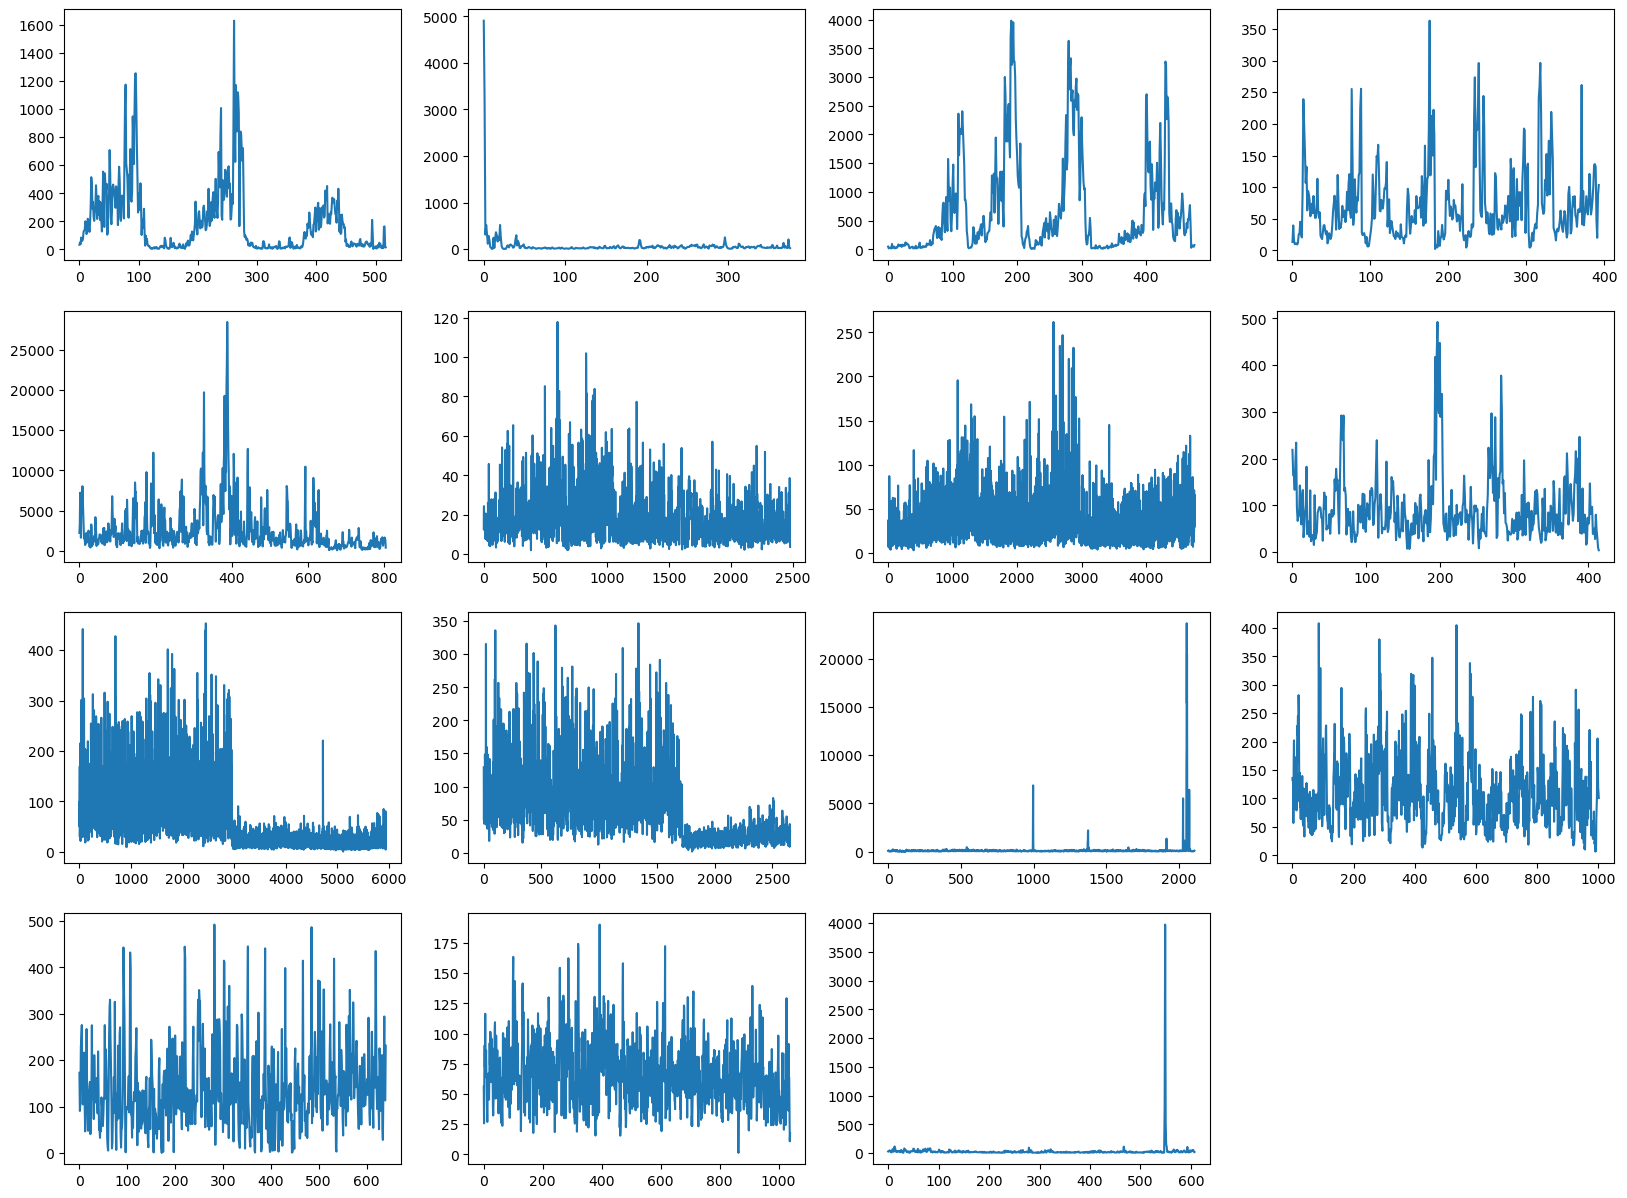

In [68]:

plt.figure(figsize=(20, 15))
for i in range(Patience_num):
    plt.subplot(4, 4, i+1)
    plt.plot(Patience_list[i][:, 150])

In [71]:
Patience_list[1][:10, 150]

array([4906.598462  , 3211.918013  ,  310.3227301 ,  517.1424721 ,
        325.4239506 ,  113.0154942 ,  281.8209522 ,  186.0961877 ,
         44.33287209,   27.21970956])

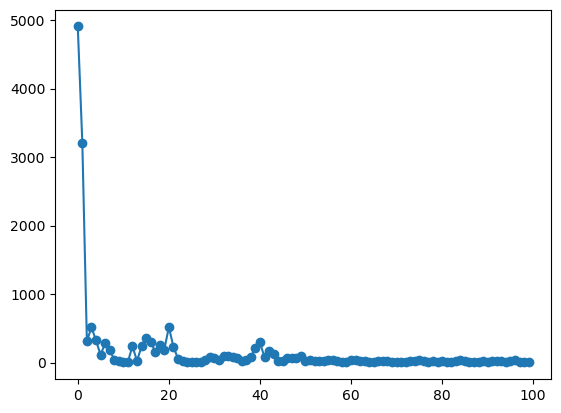

In [72]:
plt.plot(Patience_list[1][:100, 150], marker='o')

In [73]:
for i in range(Patience_num):
    print(Patience_list[i][:, 150].mean())

195.3358570237027
71.29928094028382
676.6930768202207
71.03119147520306
2525.826898038149
18.49409614013468
36.91606824957706
93.98342228076625
62.62158101533928
71.00355377573258
139.4561837000987
108.81827294824551
139.50498071491265
66.62688916646539
30.381721121006578


In [74]:
for i in range(Patience_num):
    print(Patience_list[i][:, 150].std())

241.8700520542896
304.2331190068182
848.0199814115555
57.60085964577975
2921.5056795865753
12.720006160489895
26.475004413323983
69.85049949989033
61.09287462546737
56.07269468796998
875.5494240378481
61.5071886654646
88.975091228609
26.82446737546231
165.18497207723888
